# Name:- Sakshi Dilip Tayade

# Machine Learning Intern

### Task 1:- Wine Quality Prediction

Wine quality prediction typically involves using machine learning and statistical techniques to assess and predict the quality of a wine based on various input features. Inputs like fixed acidity,volatile acidity,citric acid,residual sugar	chlorides,	free sulfur dioxide, total sulfur dioxide , density	pH sulphates ,alcohol quality

### Importing Libraries

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

### Reading the Data

In [18]:
df = pd.read_csv(r'E:\LinkedIn Internship\Bharath Intern\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.tail()#Last 5 vales

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1595,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [20]:
df.shape# number of rows and columns

(1596, 12)

In [21]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,False,False,False,False,False,False,False,False,False,False,False,False
1592,False,False,False,False,False,False,False,False,False,False,False,False
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [26]:
df.quality.value_counts().sort_index()

3     10
4     52
5    680
6    637
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

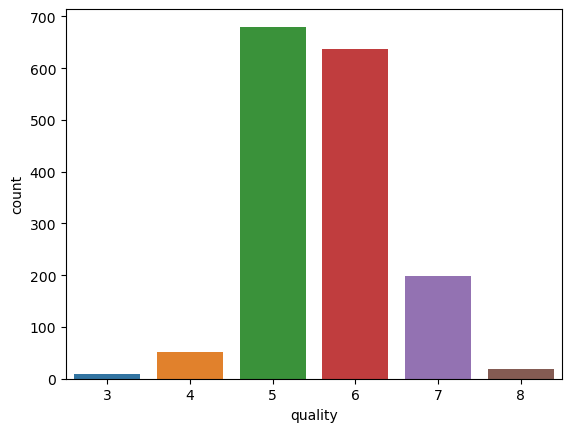

In [27]:
sns.countplot(x='quality',data=df)

In [30]:
df['alcohol'].describe()

count    1596.000000
mean       10.421147
std         1.060371
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.000000
Name: alcohol, dtype: float64

In [31]:
df['sulphates'].describe()

count    1596.000000
mean        0.656385
std         0.163057
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         1.980000
Name: sulphates, dtype: float64

In [32]:
df['citric acid'].describe()

count    1596.000000
mean        0.270276
std         0.193894
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         0.790000
Name: citric acid, dtype: float64

In [33]:
df['fixed acidity'].describe()

count    1596.000000
mean        8.314160
std         1.732203
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.600000
Name: fixed acidity, dtype: float64

In [34]:
df['residual sugar'].describe()

count    1596.000000
mean        2.535558
std         1.405515
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002232
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


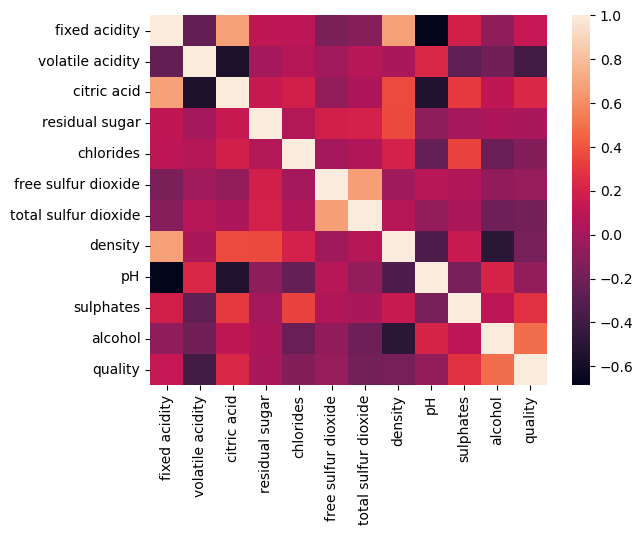

In [18]:
sns.heatmap(df.corr())
plt.show()

In [37]:
correlation = df.corr()['quality'].drop('quality')
print(correlation)

fixed acidity           0.127766
volatile acidity       -0.391735
citric acid             0.233733
residual sugar          0.016464
chlorides              -0.119770
free sulfur dioxide    -0.048641
total sulfur dioxide   -0.185404
density                -0.173251
pH                     -0.063373
sulphates               0.270777
alcohol                 0.480738
Name: quality, dtype: float64


In [38]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlations = abs_corrs[abs_corrs>correlation_threshold].index.values.tolist()
    return high_correlations

In [39]:
features = get_features(0.05)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [40]:
#impact of various factor on quality
correlation.sort_values(ascending=False)

alcohol                 0.480738
sulphates               0.270777
citric acid             0.233733
fixed acidity           0.127766
residual sugar          0.016464
free sulfur dioxide    -0.048641
pH                     -0.063373
chlorides              -0.119770
density                -0.173251
total sulfur dioxide   -0.185404
volatile acidity       -0.391735
Name: quality, dtype: float64

In [46]:
def get_features(correaltion_threshold):
    abs_corrs=correlation.abs()
    high_correlations=abs_corrs[abs_corrs>correlation_threshold].index.values.tolist()
    return high_correlations

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'alcohol'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

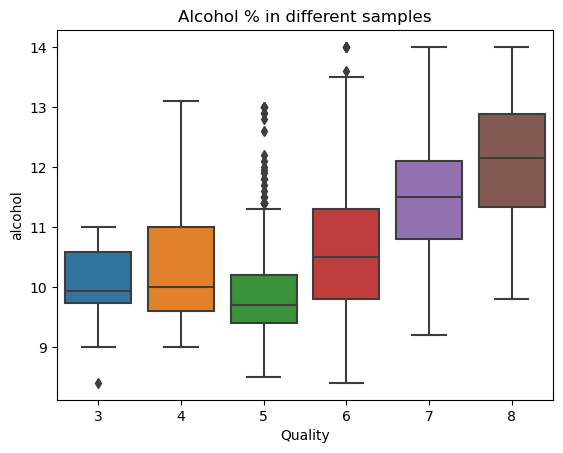

In [29]:
# To find the outliers
bx=sns.boxplot(x='quality' , y='alcohol',data=df)
bx.set(xlabel='Quality' , ylabel='alcohol' , title='Alcohol % in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'citric acid'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

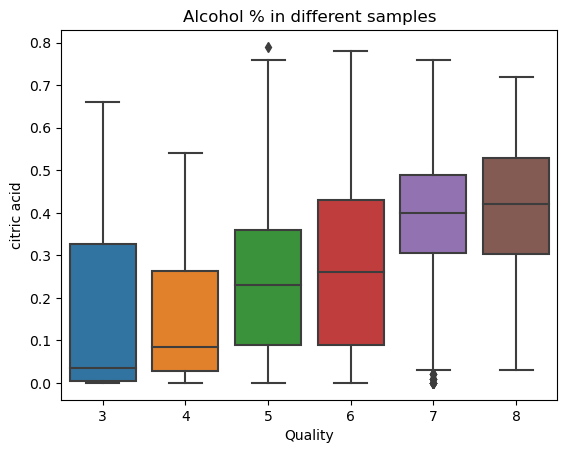

In [22]:
bx=sns.boxplot(x='quality' , y='citric acid',data=df)
bx.set(xlabel='Quality' , ylabel='citric acid' , title='Alcohol % in different samples')

In [51]:
X = df.drop('quality',axis =1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [74]:
y =df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64

In [55]:
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

In [56]:
y_test.shape

(479,)

In [58]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [59]:
regressor.intercept_

45.30299590563422

In [60]:
regressor.coef_

array([ 4.89683152e-02, -1.04417307e+00, -3.46484691e-01,  3.67577328e-02,
       -1.37384124e+00,  4.69381678e-03, -3.01490678e-03, -4.15453126e+01,
       -4.07404162e-01,  9.17520129e-01,  2.70426037e-01])

In [62]:
train_pred = regressor.predict(X_train)
train_pred

array([5.06596444, 5.47001674, 5.01803856, ..., 6.31023169, 5.8980919 ,
       6.36740967])

In [64]:
test_pred=regressor.predict(X_test)
#test_pred

In [90]:
LR = LinearRegression()

In [91]:
LR.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = LR.predict(X_test)

In [94]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 0.6349477377314551
R-squared (R²): 0.40955727451365476


In [98]:
X_test_prediction = model.predict(X_test)


In [ ]:
#test_date_accuracy = accuracy_score(X_test_prediction,y_test)
models=[LR]
scores=[]

for model in models:
    LR.fit(X_train , y_train)
    y_pred = LR.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    #print("Accuracy of "+ type(model)._name_+"is", accuracy_score(y_test,y_pred))
    print("Accuracy of Decision Tress is", accuracy_score(y_test, y_pred)*100)

In [99]:
input_data=(7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5)
input_data_as_numoy_array=np.asarray(input_data)

In [101]:
input_data_reshaped = input_data_as_numoy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[5.34438805]
Bad Quality Wine


C:\Users\My\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
